# Multiple Treatments
Julian Hsu
28 jan2023

This script will look at how multiple treatments, and their interaction, can result in incorrect inferences when we only consider the treatments when they are independent of each other.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm


In [33]:
def dgp(N=1000, w_syn=0):
    x = np.random.normal(0,1,N)
    ## Do two treatments
    w1 = np.random.choice(2,N, p=[0.60,0.40])
    w2 = np.random.choice(2,N, p=[0.60,0.40])
    
    ## Create some noise from model specification in x to make the standard errors a little more interesting
    y = 2 + 0.50*x + 1*w1 + 1*w2 + w_syn*(w1*w2)+np.random.normal(0,1,N) 
    
    df = pd.DataFrame(data={'x':x, 'y':y, 'w1':w1, 'w2':w2})
    return df

In [44]:
## For different values of w_syn, plot the point estimate and 95% confidence interval
est1_list = []
ci951_lower_list = []
ci951_upper_list = []
est2_list = []
ci952_lower_list = []
ci952_upper_list = []
wyn_list = np.arange(-1,1,0.1)
for w in wyn_list:
    df = dgp(w_syn=w)
    X = sm.add_constant(df[['x','w1','w2']])
    model = sm.OLS(df['y'],X)
    results = model.fit()
    est1 = results.params['w1']
    se1 = results.bse['w1']
    est1_list.append(est1)
    ci951_lower_list.append(est1-1.96*se1)
    ci951_upper_list.append(est1+1.96*se1)
    
    est2 = results.params['w2']
    se2 = results.bse['w2']
    est2_list.append(est2)
    ci952_lower_list.append(est2-1.96*se2)
    ci952_upper_list.append(est2+1.96*se2)
    
    

Text(0.5, 0, 'How complementary two treatments are')

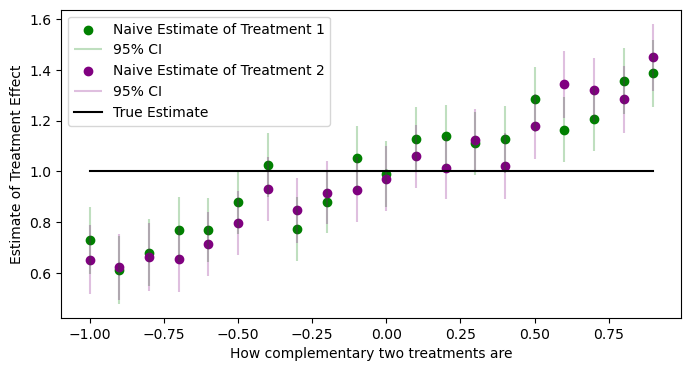

In [48]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,4))
ax.scatter(wyn_list, est1_list, color='green', label='Naive Estimate of Treatment 1')
ax.vlines(x=wyn_list, ymin=ci951_lower_list, ymax=ci951_upper_list, color='green', alpha=0.25, label='95% CI')

ax.scatter(wyn_list, est2_list, color='purple', label='Naive Estimate of Treatment 2')
ax.vlines(x=wyn_list, ymin=ci952_lower_list, ymax=ci952_upper_list, color='purple',alpha=0.25, label='95% CI')

ax.plot(wyn_list, np.ones(len(wyn_list)), color='black', label='True Estimate')
ax.legend()
ax.set_ylabel('Estimate of Treatment Effect')
ax.set_xlabel('How complementary two treatments are')